In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
data = pd.read_csv(r"Combined_Smart_Buldings.csv")

Basic Information About the Dataset:

In [4]:
data.shape

(14381639, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14381639 entries, 0 to 14381638
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   timestamp    int64  
 1   co2          float64
 2   humidity     float64
 3   light        float64
 4   pir          float64
 5   temperature  float64
 6   roomid       object 
dtypes: float64(5), int64(1), object(1)
memory usage: 768.1+ MB


In [6]:
data.head()

,timestamp,co2,humidity,light,pir,temperature,roomid
0,1377299107,488.0,45.34,97.0,NaN,23.93,413
1,1377299108,495.0,45.34,97.0,0.0,23.94,413
2,1377299110,487.0,45.34,97.0,0.0,23.94,413
3,1377299126,487.0,45.34,97.0,0.0,23.93,413
4,1377299127,496.0,45.34,97.0,0.0,23.93,413


In [7]:
data.tail()

,timestamp,co2,humidity,light,pir,temperature,roomid
14381634,1378018692,509.0,54.14,64.0,0.0,24.41,776
14381635,1378018702,509.0,54.14,64.0,0.0,24.41,776
14381636,1378018712,509.0,54.14,64.0,0.0,24.41,776
14381637,1378018722,509.0,54.14,64.0,0.0,24.41,776
14381638,1378018732,509.0,54.14,64.0,0.0,24.41,776


In [8]:
data.describe()

,timestamp,co2,humidity,light,pir,temperature
count,1.438164e+07,1.436170e+07,1.438017e+07,1.438017e+07,1.430236e+07,1.438017e+07
mean,1.377641e+09,4.114451e+02,5.670891e+01,8.227788e+01,1.307040e+00,2.395012e+01
std,2.000119e+05,1.037703e+02,4.340268e+00,3.062264e+02,1.908106e+01,2.076613e+01
min,1.377270e+09,8.000000e+00,-5.009600e+02,0.000000e+00,0.000000e+00,-4.010000e+01
25%,1.377465e+09,3.530000e+02,5.392000e+01,4.000000e+00,0.000000e+00,2.253000e+01
50%,1.377647e+09,4.110000e+02,5.697000e+01,5.000000e+00,0.000000e+00,2.310000e+01
75%,1.377814e+09,4.630000e+02,5.974000e+01,3.300000e+01,0.000000e+00,2.374000e+01
max,1.378019e+09,1.699000e+03,7.191000e+01,3.055100e+04,3.445600e+04,5.792700e+02


In [9]:
total_data = len(data)
print("Total data:",total_data)

Total data: 14381639


Finding Null Values in Each Column 

In [10]:
data.isnull().values.any()

True

In [11]:
data.describe().iloc[0]

timestamp      14381639.0
co2            14361698.0
humidity       14380168.0
light          14380168.0
pir            14302364.0
temperature    14380167.0
Name: count, dtype: float64

In [12]:
data.isnull().sum()

timestamp          0
co2            19941
humidity        1471
light           1471
pir            79275
temperature     1472
roomid             0
dtype: int64

Removing Null Values from the Dataset

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

timestamp      0
co2            0
humidity       0
light          0
pir            0
temperature    0
roomid         0
dtype: int64

In [15]:
new_total_data = len(data)
print("Total data after removing null data:", new_total_data)

Total data after removing null data: 14283276


In [16]:
removed_data = total_data - new_total_data
print("Removed data:", removed_data)

Removed data: 98363


Change Room Id Frome Object to Category

In [17]:
data['roomid']=data['roomid'].astype('category')

In [18]:
data.dtypes

timestamp         int64
co2             float64
humidity        float64
light           float64
pir             float64
temperature     float64
roomid         category
dtype: object

EDA on Individual Columns the Dataset

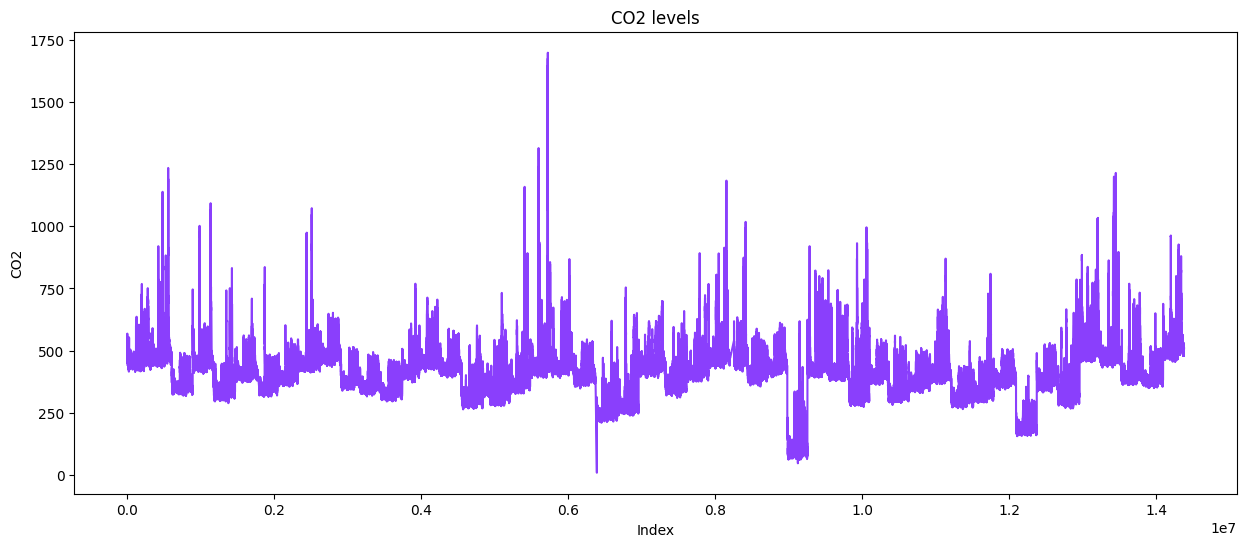

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['co2'], label='CO2', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('CO2')
plt.title('CO2 levels')
plt.show()

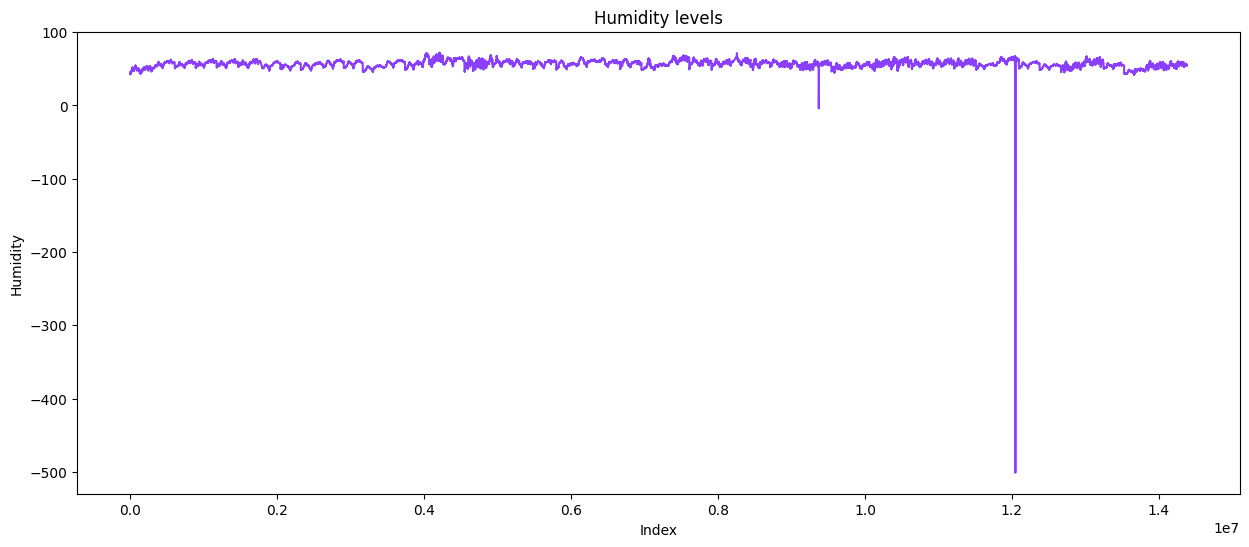

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['humidity'], label='CO2', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Humidity')
plt.title('Humidity levels')
plt.show()

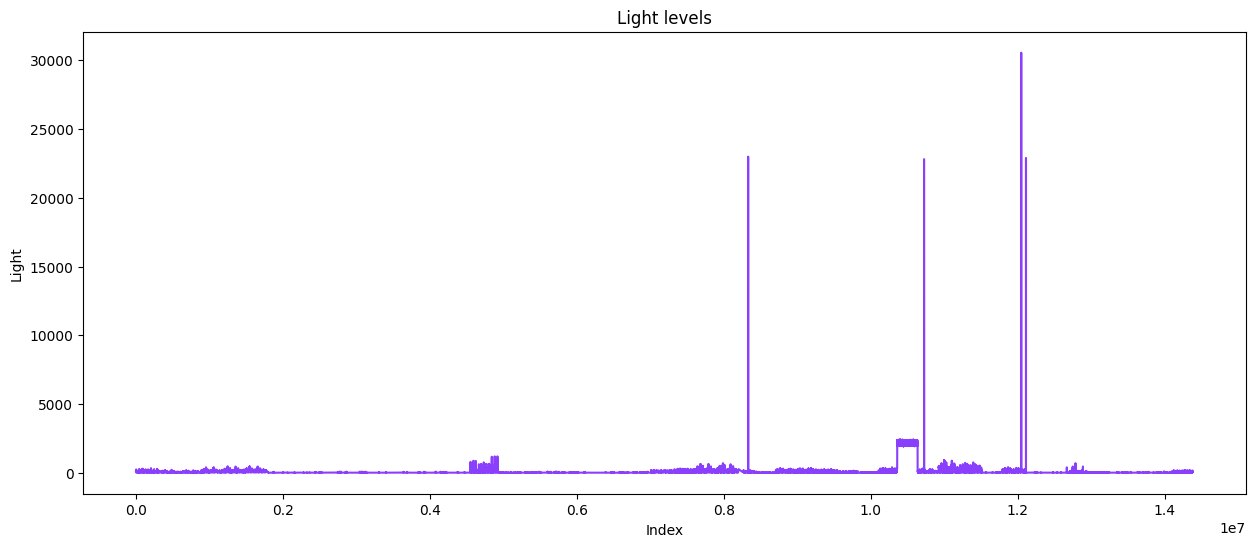

In [21]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['light'], label='Light', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Light')
plt.title('Light levels')
plt.show()

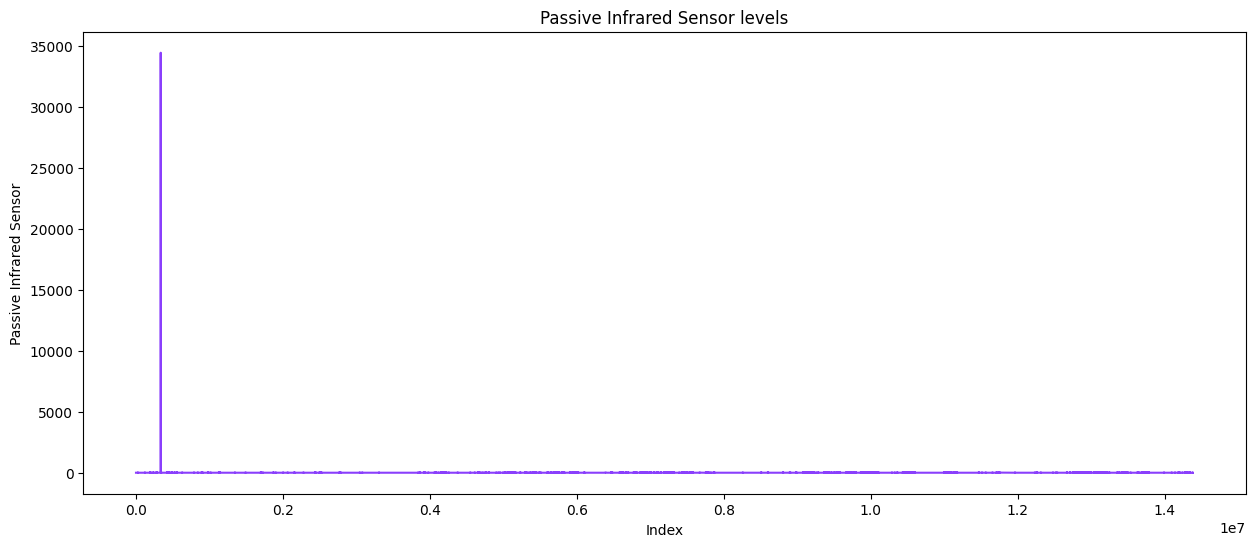

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['pir'], label='Passive Infrared Sensor', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Passive Infrared Sensor')
plt.title('Passive Infrared Sensor levels')
plt.show()

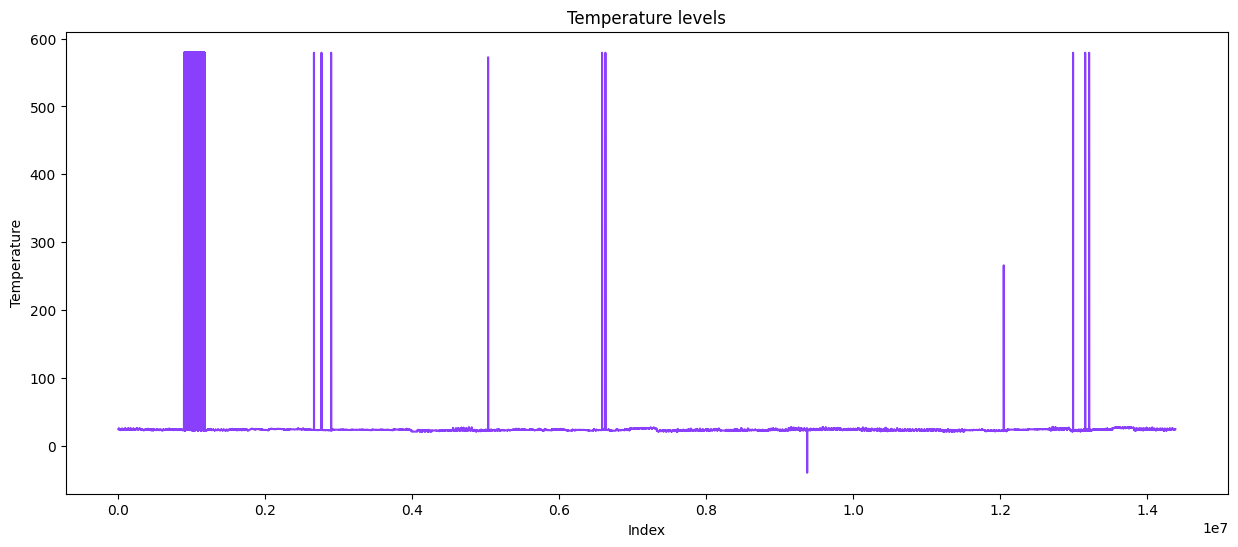

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['temperature'], label='Temperature', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature levels')
plt.show()

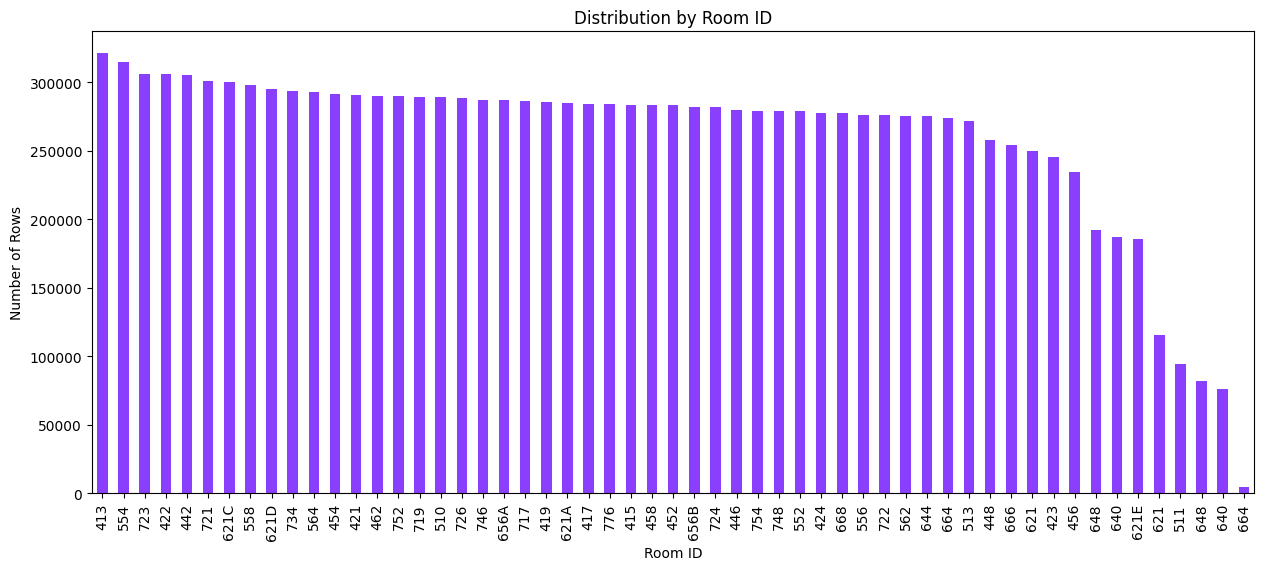

In [24]:
plt.figure(figsize=(15, 6))
# Count the number of rows for each room_id
room_id_counts = data['roomid'].value_counts()

# Plotting the bar plot
room_id_counts.plot(kind='bar', color = '#8A3FFC')

# Adding labels and title
plt.xlabel('Room ID')
plt.ylabel('Number of Rows')
plt.title('Distribution by Room ID')

# Display the plot
plt.show()

EDA on Temperature Vs All Other Columns

In [ ]:
# Columns to plot temperature against
columns_to_plot = ['co2', 'humidity', 'light', 'pir']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Iterate through columns and plot temperature against each column
for ax, column in zip(axes.flatten(), columns_to_plot):
    ax.scatter(data[column], data['temperature'], color='blue', alpha=0.5)
    ax.set_xlabel(column.capitalize())  
    ax.set_ylabel('Temperature')
    ax.set_title(f'Temperature vs {column.capitalize()}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Encode 'roomid' category column
roomid_encoded = pd.factorize(data['roomid'])[0]

In [ ]:
# Create scatter plot of temperature against 'roomid'
plt.figure(figsize=(18, 6))
plt.scatter(roomid_encoded, data['temperature'], color='blue', alpha=0.5)
plt.xlabel('Room ID (Encoded)')
plt.ylabel('Temperature')
plt.title('Temperature vs Room ID')
plt.xticks(range(len(data['roomid'].unique())), data['roomid'].unique())  
plt.show()

In [ ]:
# Select columns of interest
columns_of_interest = ["co2", "humidity", "light", "pir", "temperature"]

Pair Plots of The Float Columns

In [ ]:
sns.pairplot(data[columns_of_interest], diag_kind="hist", height=3, aspect=1.2, corner=True)
plt.show()

Histograms of all the columns in 1 frame 

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#7D3AC1']

for index, column in enumerate(columns_of_interest):
    ax = axes.flatten()[index]
    ax.hist(data[column], color=colors[index], label=column, bins=10) 
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Frequency')
    ax.legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.suptitle('Histograms', size=18)

# Show the plot
plt.show()

Running Basic Machine Learnong Algorithms on the Dataset

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
X = data[['co2', 'humidity', 'light', 'pir']]  # Features
y = data['temperature']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

In [28]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'mse': mse, 'mae': mae, 'r2': r2}

    print(f"Model: {name}")
    print(f"Parameters: {model.get_params()}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}\n")

Model: Linear Regression
Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Mean Squared Error: 439.65
Mean Absolute Error: 1.83
R-squared: 0.00

Model: Decision Tree
Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Mean Squared Error: 459.11
Mean Absolute Error: 1.42
R-squared: -0.04



In [ ]:
print("Model Comparison:")
for name, metrics in results.items():
    print(f"{name}: Mean Squared Error = {metrics['mse']:.2f}, Mean Absolute Error = {metrics['mae']:.2f}, R-squared = {metrics['r2']:.2f}")